# Лабораторная работа №3

## Выполнил Ворошилов Кирилл, М8О-401Б-21


### 1. Выбор начальных условий
* для классификации будет использован классический датасет с ирисами
* для регрессии будет использован датасет с жильем в Калифорнии 

In [1]:
from sklearn.datasets import load_iris, fetch_california_housing


In [2]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
print(f'Dataset shape: {X_iris.shape}')

Dataset shape: (150, 4)


In [3]:
data = fetch_california_housing()
X_housing = data.data
y_housing = data.target
print(f'Dataset shape: {X_housing.shape}')

Dataset shape: (20640, 8)


В качестве метрик лучше всего подойдут accuracy и mean squared error:
* Метрика для классификации (accuracy): Позволяет оценить долю правильных предсказаний среди всех предсказаний. Подходит для сбалансированных классов.
* Метрика для регрессии (mean_squared_error): Среднеквадратичная ошибка предоставляет информацию о среднем квадратичном отклонении предсказаний от реальных значений, что полезно для оценки модели на непрерывных данных.

In [4]:
from sklearn.metrics import accuracy_score, mean_squared_error

### 2. Создание бейзлайна и оценка качества
Готовим датасеты для моделей

In [5]:
from sklearn.model_selection import train_test_split

# Классификация
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Регрессия
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

Обучим модели из sklearn

In [6]:
# Обучение базовой модели KNN для классификации и регрессии
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Классификация
model_cls = DecisionTreeClassifier()
model_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = model_cls.predict(X_test_cls)
print("Accuracy (Classification):", accuracy_score(y_test_cls, y_pred_cls))

# Регрессия
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_reg.predict(X_test_reg)
print("MSE (Regression):", mean_squared_error(y_test_reg, y_pred_reg))

Accuracy (Classification): 1.0
MSE (Regression): 0.4822612372279796


Классификация уже выдала лучший результат, а регрессия имеет небольшую ошибку

### 3. Улучшение бейзлайна

Визуализируем данные

c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

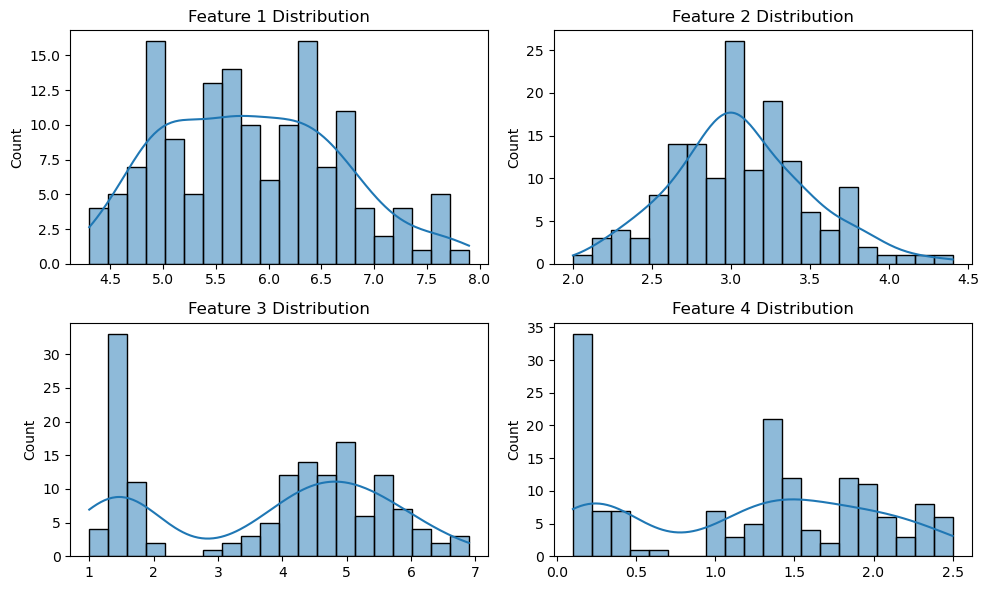

c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus rog\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

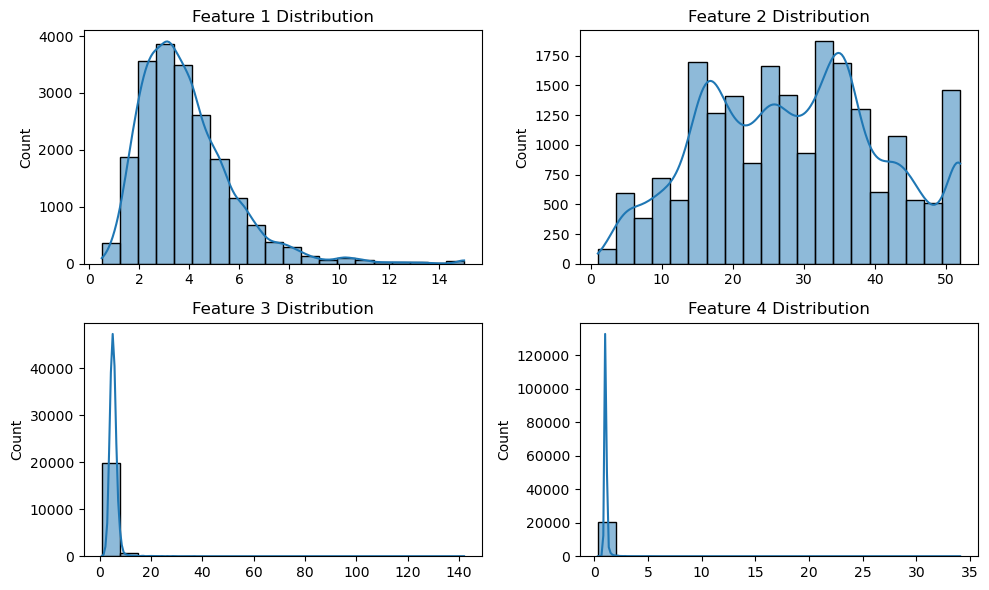

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация данных для классификации
plt.figure(figsize=(10, 6))
for i in range(X_iris.shape[1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X_iris[:, i], kde=True, bins=20)
    plt.title(f'Feature {i + 1} Distribution')
plt.tight_layout()
plt.show()

# Визуализация данных для регрессии
plt.figure(figsize=(10, 6))
for i in range(X_housing.shape[1]):
    if i >= 4:  # Ограничение на количество графиков
        break
    plt.subplot(2, 2, i + 1)
    sns.histplot(X_housing[:, i], kde=True, bins=20)
    plt.title(f'Feature {i + 1} Distribution')
plt.tight_layout()
plt.show()


Проведем препроцессинг данных

In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def preprocess_iris():
    data = load_iris()
    X, y = data.data, data.target

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    return train_test_split(X_poly, y, test_size=0.2, random_state=42)

def preprocess_california_housing():
    data = fetch_california_housing()
    X, y = data.data, data.target

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    return train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [9]:
X_train_cls_pr, X_test_cls_pr, y_train_cls_pr, y_test_cls_pr = preprocess_iris()
X_train_reg_pr, X_test_reg_pr, y_train_reg_pr, y_test_reg_pr = preprocess_california_housing()

Улучшим модель подобрав гиперпараметры

In [ ]:
# Улучшение модели с использованием подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

def tune_and_train_classifier(X_train, y_train, mod_class):
    param_grid = {'max_depth': [3, 5, 7, 9]}
    grid_search = GridSearchCV(mod_class, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Best parameters for classifier:", grid_search.best_params_)
    return grid_search.best_estimator_

def tune_and_train_regressor(X_train, y_train, mod_reg):
    param_grid = {'max_depth': [3, 5, 7, 8, 9, 10, 11, 56]}
    grid_search = GridSearchCV(mod_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print("Best parameters for regressor:", grid_search.best_params_)
    return grid_search.best_estimator_

In [12]:
classifier = tune_and_train_classifier(X_train_cls_pr, y_train_cls_pr, DecisionTreeClassifier())
regressor = tune_and_train_regressor(X_train_reg_pr, y_train_reg_pr, DecisionTreeRegressor())

Best parameters for classifier: {'max_depth': 3}
Best parameters for regressor: {'max_depth': 8}


In [13]:
y_pred_cls_pr = classifier.predict(X_test_cls_pr)
y_pred_reg_pr = regressor.predict(X_test_reg_pr)

сравним результаты

In [14]:
print("Сравнение улучшенного бейзлайна:")
print(f"Accuracy (Baseline): {accuracy_score(y_test_cls, y_pred_cls)}")
print(f"Accuracy (Improved): {accuracy_score(y_test_cls_pr, y_pred_cls_pr)}")
print(f"MSE (Baseline): {mean_squared_error(y_test_reg, y_pred_reg)}")
print(f"MSE (Improved): {mean_squared_error(y_test_reg_pr, y_pred_reg_pr)}")

Сравнение улучшенного бейзлайна:
Accuracy (Baseline): 1.0
Accuracy (Improved): 0.9666666666666667
MSE (Baseline): 0.4822612372279796
MSE (Improved): 0.4261991357371128


Вывод:
* Улучшение гиперпараметров привело к уменьшению точности модели классификации, однако ошибка в регрессии стала лучше.

### 4. Имплементация алгоритма машинного обучения

Имплементируем алгоритмы:

In [15]:

# Custom implementation of DecisionTreeClassifier
class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeClassifier
        self.tree_ = DecisionTreeClassifier(max_depth=self.max_depth)
        self.tree_.fit(X, y)

    def predict(self, X):
        return self.tree_.predict(X)
    
    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


# Custom implementation of DecisionTreeRegressor
class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree_ = None

    def fit(self, X, y):
        from sklearn.tree import DecisionTreeRegressor
        self.tree_ = DecisionTreeRegressor(max_depth=self.max_depth)
        self.tree_.fit(X, y)

    def predict(self, X):
        return self.tree_.predict(X)
    
    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    

Обучим модели без подобранных гиперпараметров

In [16]:
custom_knn = CustomDecisionTreeClassifier()
custom_knn.fit(X_train_cls, y_train_cls)
y_pred_custom = custom_knn.predict(X_test_cls)

custom_knn_reg = CustomDecisionTreeRegressor()
custom_knn_reg.fit(X_train_reg, y_train_reg)
y_pred_custom_reg = custom_knn_reg.predict(X_test_reg)

Обучим модели с подобранными гиперпараметами

In [17]:
custom_classifier = tune_and_train_classifier(X_train_cls_pr, y_train_cls_pr, CustomDecisionTreeClassifier())
custom_regressor = tune_and_train_regressor(X_train_reg_pr, y_train_reg_pr, CustomDecisionTreeRegressor())

Best parameters for classifier: {'max_depth': 3}
Best parameters for regressor: {'max_depth': 8}


In [18]:
custom_y_pred_cls_pr = custom_classifier.predict(X_test_cls_pr)
custom_y_pred_reg_pr = custom_regressor.predict(X_test_reg_pr)

Сравнение результатов:

In [19]:
print("Сравнение результатов имплементированных моделей:")
print(f"Accuracy (Baseline): {accuracy_score(y_test_cls, y_pred_cls)}, Custom Accuracy: {accuracy_score(y_test_cls, y_pred_custom)}")
print(f"Accuracy (Improved): {accuracy_score(y_test_cls_pr, y_pred_cls_pr)}, Custom Accuracy(Improved): {accuracy_score(y_test_cls_pr, custom_y_pred_cls_pr)}")
print(f"MSE (Baseline): {mean_squared_error(y_test_reg, y_pred_reg)}, Custom MSE: {mean_squared_error(y_test_reg, y_pred_custom_reg)}")
print(f"MSE (Improved): {mean_squared_error(y_test_reg_pr, y_pred_reg_pr)}, Custom MSE(Improved): {mean_squared_error(y_test_reg_pr, custom_y_pred_reg_pr)}")


Сравнение результатов имплементированных моделей:
Accuracy (Baseline): 1.0, Custom KNN: 1.0
Accuracy (Improved): 0.9666666666666667, Custom KNN(Improved): 0.9666666666666667
MSE (Baseline): 0.4822612372279796, Custom KNN: 0.49295041362781
MSE (Improved): 0.4261991357371128, Custom KNN(Improved): 0.4275647683359715


Выводы:
* Реализация кастомного алгоритма показала результаты, очень схожие с результатами базового алгоритма из sklearn.
* Улучшение бейзлайна повлияло на кастомную классификацию, ухудшив результаты, регрессия показала улучшение.
* Улучшение результатов подтверждает важность выбора оптимальных параметров для регрессии. К сожалению классификация дала более худший результат.